In [1]:
#https://machinelearningmastery.com/multi-step-time-series-forecasting-long-short-term-memory-networks-python/
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array
import numpy as np

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.
/home/greed/anaconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/greed/anaconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/greed/anaconda3/envs/tensorflow_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])

In [2]:
# univariate data preparation
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        #gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
def lioshas_data():
    series = read_csv('db_seq.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)
    d=series.values
    Xlen=round(len(series)*0.8)
    trainLen = len(series)-Xlen
    return Xlen, trainLen, d

Xlen=350
trainLen=250

d=[]
for i in range(1,Xlen):
    #y=np.sin(i)*np.sin(i*20)*0.2+np.sin(i/10)*0.3
    #y=np.sin(i/20)*0.3+np.sin(i*40)*0.1*np.sin(i*40)
    y=np.sin(i/20)
    #y=0.55*i+13
    #y=i
    d.append(y)
    
Xlen, trainLen, d = lioshas_data()
# define input sequence
#raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
raw_seq=d
# choose a number of time steps
n_steps = 20
# split into samples
X, y = split_sequence(raw_seq, n_steps)

XTrain=X[:trainLen]
YTrain=y[:trainLen]
# summarize the data
XTest=X[trainLen:len(X)]
YTest=y[trainLen:len(y)]

#print(XTrain[0])

In [4]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
n_batch = 1
XTrain = XTrain.reshape((XTrain.shape[0], XTrain.shape[1], n_features))
#print('x', X)
model = Sequential()
model.add(LSTM(100, activation='relu',  
               #return_sequences=True, 
               input_shape=(n_steps, n_features), 
               #batch_input_shape=(n_batch, X.shape[1], X.shape[2])
               #stateful=True
              ))
#model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse')
model.compile(loss='mean_squared_error', optimizer='adam')

In [5]:
model.fit(XTrain, YTrain, epochs=1000, verbose=1)


Epoch 1/1000
250/250 [==============================] - 1s 2ms/step - loss: 0.3663
Epoch 2/1000
250/250 [==============================] - 0s 346us/step - loss: 0.1635
Epoch 3/1000
250/250 [==============================] - 0s 351us/step - loss: 0.0603
Epoch 4/1000
250/250 [==============================] - 0s 344us/step - loss: 0.0315
Epoch 5/1000
250/250 [==============================] - 0s 339us/step - loss: 0.0277
Epoch 6/1000
250/250 [==============================] - 0s 343us/step - loss: 0.0184
Epoch 7/1000
250/250 [==============================] - 0s 354us/step - loss: 0.0106
Epoch 8/1000
250/250 [==============================] - 0s 348us/step - loss: 0.0086
Epoch 9/1000
250/250 [==============================] - 0s 337us/step - loss: 0.0067
Epoch 10/1000
250/250 [==============================] - 0s 336us/step - loss: 0.0045
Epoch 11/1000
250/250 [==============================] - 0s 336us/step - loss: 0.0019
Epoch 12/1000
250/250 [==============================] - 0s 343u

250/250 [==============================] - 0s 345us/step - loss: 4.9323e-06
Epoch 91/1000
250/250 [==============================] - 0s 349us/step - loss: 6.4411e-06
Epoch 92/1000
250/250 [==============================] - 0s 346us/step - loss: 5.6508e-06
Epoch 93/1000
250/250 [==============================] - 0s 347us/step - loss: 3.9590e-06
Epoch 94/1000
250/250 [==============================] - 0s 341us/step - loss: 3.3461e-06
Epoch 95/1000
250/250 [==============================] - 0s 343us/step - loss: 2.9067e-06
Epoch 96/1000
250/250 [==============================] - 0s 342us/step - loss: 2.6462e-06
Epoch 97/1000
250/250 [==============================] - 0s 335us/step - loss: 3.4874e-06
Epoch 98/1000
250/250 [==============================] - 0s 345us/step - loss: 2.0472e-06
Epoch 99/1000
250/250 [==============================] - 0s 339us/step - loss: 2.3162e-06
Epoch 100/1000
250/250 [==============================] - 0s 345us/step - loss: 2.5378e-06
Epoch 101/1000
250/250 

250/250 [==============================] - 0s 336us/step - loss: 7.9460e-04
Epoch 271/1000
250/250 [==============================] - 0s 333us/step - loss: 4.5848e-04
Epoch 272/1000
250/250 [==============================] - 0s 338us/step - loss: 3.7265e-04
Epoch 273/1000
250/250 [==============================] - 0s 349us/step - loss: 4.0799e-04
Epoch 274/1000
250/250 [==============================] - 0s 335us/step - loss: 4.0474e-04
Epoch 275/1000
250/250 [==============================] - 0s 336us/step - loss: 1.3051e-04
Epoch 276/1000
250/250 [==============================] - 0s 337us/step - loss: 7.8114e-05
Epoch 277/1000
250/250 [==============================] - 0s 338us/step - loss: 4.1719e-05
Epoch 278/1000
250/250 [==============================] - 0s 340us/step - loss: 1.7207e-05
Epoch 279/1000
250/250 [==============================] - 0s 341us/step - loss: 1.4405e-05
Epoch 280/1000
250/250 [==============================] - 0s 343us/step - loss: 7.4758e-06
Epoch 281/1000

250/250 [==============================] - 0s 341us/step - loss: 2.6291e-07
Epoch 451/1000
250/250 [==============================] - 0s 339us/step - loss: 9.9274e-07
Epoch 452/1000
250/250 [==============================] - 0s 336us/step - loss: 1.3738e-06
Epoch 453/1000
250/250 [==============================] - 0s 337us/step - loss: 4.0699e-06
Epoch 454/1000
250/250 [==============================] - 0s 334us/step - loss: 3.9279e-06
Epoch 455/1000
250/250 [==============================] - 0s 340us/step - loss: 3.1514e-06
Epoch 456/1000
250/250 [==============================] - 0s 336us/step - loss: 1.3521e-05
Epoch 457/1000
250/250 [==============================] - 0s 335us/step - loss: 7.0770e-06
Epoch 458/1000
250/250 [==============================] - 0s 341us/step - loss: 1.4885e-06
Epoch 459/1000
250/250 [==============================] - 0s 338us/step - loss: 1.0766e-06
Epoch 460/1000
250/250 [==============================] - 0s 336us/step - loss: 8.0258e-07
Epoch 461/1000

250/250 [==============================] - 0s 336us/step - loss: 8.1181e-07
Epoch 631/1000
250/250 [==============================] - 0s 339us/step - loss: 7.3637e-07
Epoch 632/1000
250/250 [==============================] - 0s 334us/step - loss: 2.7033e-07
Epoch 633/1000
250/250 [==============================] - 0s 336us/step - loss: 1.3808e-07
Epoch 634/1000
250/250 [==============================] - 0s 331us/step - loss: 1.8414e-07
Epoch 635/1000
250/250 [==============================] - 0s 345us/step - loss: 9.2482e-08
Epoch 636/1000
250/250 [==============================] - 0s 334us/step - loss: 1.1930e-07
Epoch 637/1000
250/250 [==============================] - 0s 332us/step - loss: 3.3485e-07
Epoch 638/1000
250/250 [==============================] - 0s 333us/step - loss: 1.4322e-07
Epoch 639/1000
250/250 [==============================] - 0s 337us/step - loss: 1.0730e-07
Epoch 640/1000
250/250 [==============================] - 0s 332us/step - loss: 8.2669e-08
Epoch 641/1000

250/250 [==============================] - 0s 339us/step - loss: 9.3457e-08
Epoch 811/1000
250/250 [==============================] - 0s 340us/step - loss: 3.3277e-08
Epoch 812/1000
250/250 [==============================] - 0s 338us/step - loss: 3.5331e-08
Epoch 813/1000
250/250 [==============================] - 0s 338us/step - loss: 4.1991e-08
Epoch 814/1000
250/250 [==============================] - 0s 333us/step - loss: 1.2856e-07
Epoch 815/1000
250/250 [==============================] - 0s 333us/step - loss: 2.3777e-08
Epoch 816/1000
250/250 [==============================] - 0s 338us/step - loss: 4.2830e-08
Epoch 817/1000
250/250 [==============================] - 0s 331us/step - loss: 1.3102e-07
Epoch 818/1000
250/250 [==============================] - 0s 333us/step - loss: 1.1699e-07
Epoch 819/1000
250/250 [==============================] - 0s 341us/step - loss: 8.3490e-08
Epoch 820/1000
250/250 [==============================] - 0s 355us/step - loss: 3.3454e-07
Epoch 821/1000

250/250 [==============================] - 0s 338us/step - loss: 1.9863e-06
Epoch 991/1000
250/250 [==============================] - 0s 335us/step - loss: 1.6231e-06
Epoch 992/1000
250/250 [==============================] - 0s 341us/step - loss: 2.0606e-06
Epoch 993/1000
250/250 [==============================] - 0s 337us/step - loss: 1.2841e-06
Epoch 994/1000
250/250 [==============================] - 0s 334us/step - loss: 1.1674e-06
Epoch 995/1000
250/250 [==============================] - 0s 334us/step - loss: 2.1984e-06
Epoch 996/1000
250/250 [==============================] - 0s 345us/step - loss: 3.2876e-06
Epoch 997/1000
250/250 [==============================] - 0s 337us/step - loss: 9.7981e-06
Epoch 998/1000
250/250 [==============================] - 0s 331us/step - loss: 2.3042e-05
Epoch 999/1000
250/250 [==============================] - 0s 334us/step - loss: 1.9341e-05
Epoch 1000/1000
250/250 [==============================] - 0s 333us/step - loss: 2.1151e-05


In [7]:
loss = model.evaluate(XTrain, YTrain, verbose=1)
print("loss {0:8.6f}%".format(loss*100))

250/250 [==============================] - 0s 422us/step
loss 0.002232%


In [8]:
YPred=[]
for rec in range(0, len(XTest)):
    x_input = XTest[rec]
    n_steps_in=n_steps
    n_features=1
    x_input = x_input.reshape((1, n_steps_in, n_features))
    yhat = model.predict(x_input, verbose=0)
    YPred.append(yhat)

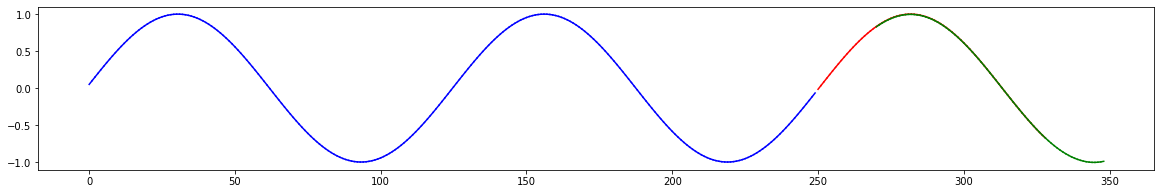

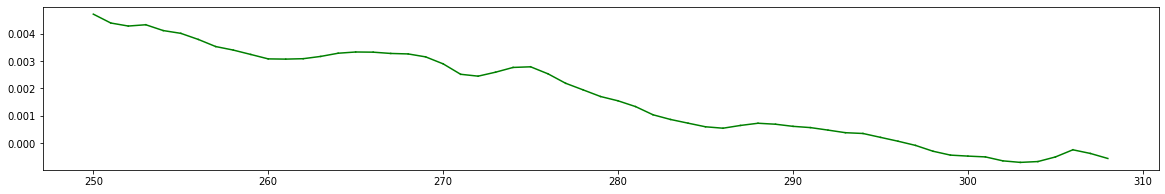

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as mlines

%matplotlib inline

###############################

fig = plt.figure(figsize=(20, 3))
for i in range(0, len(XTrain)-1):
    x1, x2 = i, i+1
    y1, y2 = XTrain[i][0], XTrain[i+1][0]
    #print('#', x1, x2, y1, y2)
    plt.plot([x1,x2],[y1,y2],color='blue')

err=[]
for i in range(0, len(XTest)-1):
    x1, x2 = i+trainLen, i+1+trainLen
    y1, y2 = XTest[i][0], XTest[i+1][0]
    #print('#', x1, x2, y1, y2)
    plt.plot([x1,x2],[y1,y2],color='red')

for i in range(0, len(YPred)-1):
    x1, x2 = i+trainLen, i+1+trainLen
    y1, y2 = XTest[i][0], XTest[i+1][0]
    
    x1_pred, x2_pred = i+trainLen+n_steps, i+1+trainLen+n_steps
    y1_pred, y2_pred = YPred[i][0], YPred[i+1][0]
    #print('#', x1, x2, y1, y2)
    plt.plot([x1_pred,x2_pred],[y1_pred,y2_pred],color='green')
    
    if i+n_steps<len(XTest):
        err.append({'x':i, 'y':XTest[i+n_steps][0]-y1_pred})    
    
    #print(i, XTest[i+n_steps][0], XTest[i+1+n_steps][0], y1_pred, y2_pred)
plt.show()

fig = plt.figure(figsize=(20, 3))
for i in range(0, len(err)-1):
    x1, x2 = i+trainLen, i+1+trainLen
    y1, y2 = err[i]['y'], err[i+1]['y']
    #print('#', x1, x2, y1, y2)
    plt.plot([x1,x2],[y1,y2],color='green')
    #err.append({'x':i, 'y':YPred[i]-YTest[i]})
plt.show()